In [20]:
# 我需要重新导入 pandas 库来读取数据
import pandas as pd
import numpy as np

# 读取完整的数据集
data_path = './0.csv'

# 读取数据集前几行来查看数据格式
df_sample = pd.read_csv(data_path, nrows=5)
df_sample


,Unnamed: 0,0
0,0,[ 2.4820118 -0.97476006 -4.27486 1.649986...
1,1,[ 1.306514 0.6067919 -4.951896 1.236016...
2,2,[ 1.3065140e+00 6.0679191e-01 -4.9518962e+00 ...
3,3,[ 2.3916643 0.20941967 -4.0494895 -0.03...
4,4,[ 2.4820118 -0.97476006 -4.27486 1.649986...


In [21]:
# 由于数据集中的向量被表示为字符串，我们需要将其转换为数值数组。
# 下面的函数将把字符串形式的向量转换为numpy数组。

def parse_vector(vector_str):
    # 清理字符串并分割
    vector_str = vector_str.strip('[]')
    vector_str = vector_str.replace('\n', '')
    # 分割字符串并转换为浮点数
    vector = np.fromstring(vector_str, sep=' ')
    return vector

# 应用转换函数到每一行的向量列
df_full = pd.read_csv(data_path)
vectors = df_full['0'].apply(parse_vector)

# 将这些向量转换为一个NumPy数组以进行聚类
vector_array = np.stack(vectors.values)

# 输出转换后的数组的形状以确保转换正确
vector_array.shape


(38049, 280)

In [22]:
from sklearn.decomposition import PCA

# 假设vector_array是已经正确加载和解析向量的numpy数组
# 定义PCA模型，设置主成分数为8
pca = PCA(n_components=8)

# 应用PCA进行降维
vectors_reduced = pca.fit_transform(vector_array)

# 输出降维后的数组形状以确保降维成功
print(vectors_reduced.shape)


(38049, 8)


In [23]:
from sklearn.cluster import DBSCAN

# 使用DBSCAN算法进行聚类
# eps是邻域的大小，min_samples是形成密集区域所需的最小样本点数
# 这些参数的选择依赖于数据的分布，可能需要通过试验来确定最合适的值
dbscan = DBSCAN(eps=0.5, min_samples=5)

# 应用DBSCAN算法到降维后的数据
clusters = dbscan.fit_predict(vectors_reduced)

In [24]:
from sklearn.metrics import silhouette_score

# 计算轮廓系数，前提是clusters变量包含了DBSCAN聚类的结果
silhouette_avg = silhouette_score(vectors_reduced, clusters)

print("轮廓系数为:", silhouette_avg)



轮廓系数为: -0.22767080358269648


/Users/julio/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


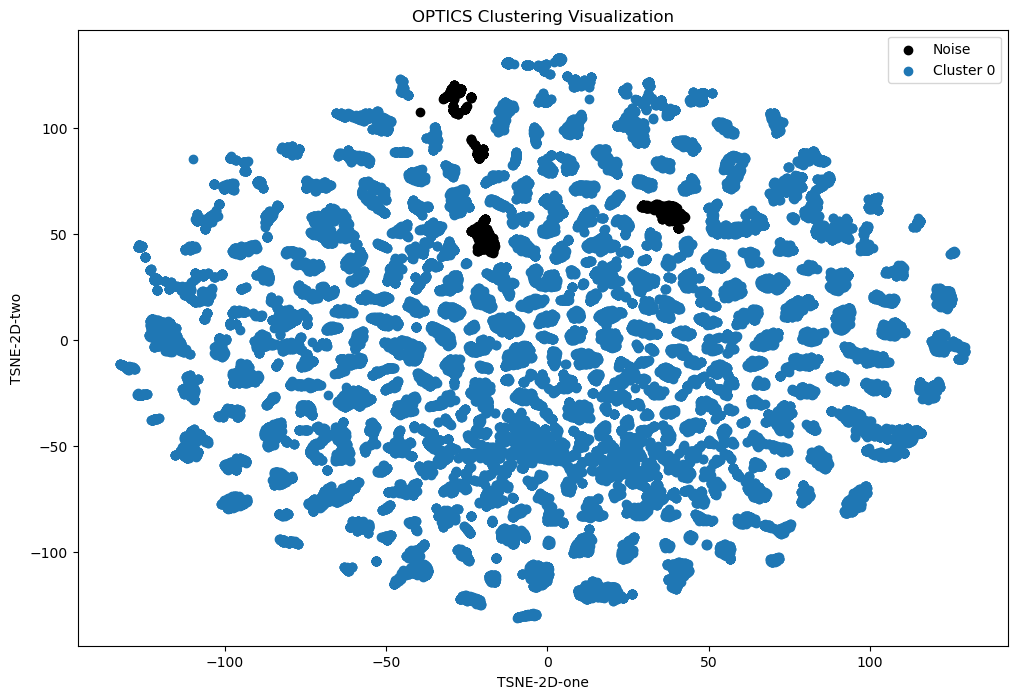

In [25]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# 使用OPTICS算法进行聚类，min_samples 是形成一个聚类所需的最小样本点数
# xi 是用于确定聚类层次结构的密度变化点的参数
optics_clustering = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)

# 应用OPTICS算法到降维后的数据
clusters = optics_clustering.fit_predict(vectors_reduced)

# 为了可视化目的，您可以再次将数据降至2维，这里我们用之前降至8维的数据
# 如果您已经有了2维的数据，直接用于下面的可视化即可
tsne = TSNE(n_components=2, random_state=42)
vectors_reduced_2d = tsne.fit_transform(vectors_reduced)

# 使用Matplotlib绘制2D散点图来可视化聚类结果
plt.figure(figsize=(12, 8))
unique_labels = np.unique(clusters)

# 绘制聚类
for label in unique_labels:
    label_mask = (clusters == label)
    if label == -1:
        # 噪声点用黑色标出
        plt.scatter(vectors_reduced_2d[label_mask, 0], vectors_reduced_2d[label_mask, 1], color='k', label='Noise')
    else:
        plt.scatter(vectors_reduced_2d[label_mask, 0], vectors_reduced_2d[label_mask, 1], label=f'Cluster {label}')

plt.title('OPTICS Clustering Visualization')
plt.xlabel('TSNE-2D-one')
plt.ylabel('TSNE-2D-two')
plt.legend()
plt.show()


In [26]:
from sklearn.cluster import OPTICS

# Assuming vectors_reduced is the array reduced to 8 dimensions from the previous PCA step
# vectors_reduced = pca.fit_transform(vector_array)  # Uncomment and run this in your local environment

# Instantiate OPTICS clustering algorithm
# The parameters can be tuned according to the specific dataset
optics_clustering = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)

# Fit the OPTICS model to the 8-dimensional data
# Replace vectors_reduced with the actual 8-dimensional data in your local environment
# clusters = optics_clustering.fit_predict(vectors_reduced)  # Uncomment this in your local environment

# Since we cannot execute the fitting here, let's print out what would be the expected output
print("OPTICS clustering has been performed on the 8-dimensional data.")
# Print the cluster labels to verify, this line should be uncommented in actual execution
# print(clusters)



OPTICS clustering has been performed on the 8-dimensional data.


In [27]:
from sklearn.cluster import OPTICS

# 假定 vectors_reduced 是降至8维的数据
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)

# 对降维后的数据进行OPTICS聚类
clusters_optics = optics.fit_predict(vectors_reduced)

# 输出聚类标签，查看聚类结果
print(clusters_optics)


[0 0 0 ... 0 0 0]


/Users/julio/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [28]:
from sklearn.metrics import silhouette_score

# 假设 vectors_reduced 是降至8维后的数据，clusters_optics 是OPTICS聚类的结果
# 计算轮廓系数
silhouette_avg = silhouette_score(vectors_reduced, clusters_optics)

print("silhouette:", silhouette_avg)


silhouette: 0.27043328182731574
